In [1]:
import os
import duckdb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# this works with MIMIC-III demo 
# https://physionet.org/content/mimiciii-demo/1.4/

# If you want to persist the database, uncomment the following line and set the path instead of in memory
# you may need to do this if you are working with large data or don't have enough RAM
# db_path = './data/db/mimic.db'
db_path = ':memory:'
extract_dir = './data/mimic-demo'
con = duckdb.connect(db_path)


In [2]:
def detect_date_columns(sample_df):
    date_cols = []
    for col in sample_df.columns:
        try:
            parsed = pd.to_datetime(sample_df[col], errors='coerce')
            non_null = parsed.notnull().sum()
            if non_null / len(parsed) > 0.8:  # at least 80% parsable
                date_cols.append(col)
        except Exception:
            continue
    return date_cols

for file_name in os.listdir(extract_dir):
    if file_name.endswith('.csv'):
        file_path = os.path.join(extract_dir, file_name)
        table_name = os.path.splitext(file_name)[0]

        try:
            sample = pd.read_csv(file_path, nrows=100)
            date_cols = detect_date_columns(sample)

            # Load full CSV parsing detected date columns
            df = pd.read_csv(file_path, parse_dates=date_cols)
            
            # Register and write to DuckDB
            con.register('df_view', df)
            con.execute(f"CREATE OR REPLACE TABLE {table_name} AS SELECT * FROM df_view")
            print(f"Loaded: {table_name} (dates: {date_cols})")
        except Exception as e:
            print(f"Failed to load {file_name}: {e}")

/var/folders/rj/p9v68y5j0zjfffhw8x57q4nr0000gp/T/ipykernel_63916/494343534.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  parsed = pd.to_datetime(sample_df[col], errors='coerce')
/var/folders/rj/p9v68y5j0zjfffhw8x57q4nr0000gp/T/ipykernel_63916/494343534.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  parsed = pd.to_datetime(sample_df[col], errors='coerce')
/var/folders/rj/p9v68y5j0zjfffhw8x57q4nr0000gp/T/ipykernel_63916/494343534.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  parsed = pd.to_datetime(sample_df[col], errors='coerce')
/var/folders/rj/p9v68y5j0zjf

Loaded: PROCEDUREEVENTS_MV (dates: ['row_id', 'subject_id', 'hadm_id', 'icustay_id', 'starttime', 'endtime', 'itemid', 'value', 'storetime', 'cgid', 'orderid', 'linkorderid', 'isopenbag', 'continueinnextdept', 'cancelreason'])
Loaded: CALLOUT (dates: ['row_id', 'subject_id', 'hadm_id', 'submit_wardid', 'curr_wardid', 'callout_wardid', 'request_tele', 'request_resp', 'request_cdiff', 'request_mrsa', 'request_vre', 'discharge_wardid', 'createtime', 'updatetime', 'acknowledgetime', 'outcometime'])
Loaded: D_CPT (dates: ['row_id', 'category', 'mincodeinsubsection', 'maxcodeinsubsection'])
Loaded: D_ITEMS (dates: ['row_id', 'itemid'])
Loaded: CAREGIVERS (dates: ['row_id', 'cgid'])
Loaded: MICROBIOLOGYEVENTS (dates: ['row_id', 'subject_id', 'hadm_id', 'chartdate', 'charttime', 'spec_itemid'])
Loaded: LABEVENTS (dates: ['row_id', 'subject_id', 'itemid', 'charttime'])


/var/folders/rj/p9v68y5j0zjfffhw8x57q4nr0000gp/T/ipykernel_63916/494343534.py:23: DtypeWarning: Columns (17,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, parse_dates=date_cols)
/var/folders/rj/p9v68y5j0zjfffhw8x57q4nr0000gp/T/ipykernel_63916/494343534.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(file_path, parse_dates=date_cols)
/var/folders/rj/p9v68y5j0zjfffhw8x57q4nr0000gp/T/ipykernel_63916/494343534.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(file_path, parse_dates=date_cols)
/var/folders/rj/p9v68y5j0zjfffhw8x57q4nr0000gp/T/ipykernel_63916/494343534.py:23: UserWarning: Could not infer format, s

Loaded: INPUTEVENTS_CV (dates: ['row_id', 'subject_id', 'hadm_id', 'icustay_id', 'charttime', 'itemid', 'amount', 'storetime', 'cgid', 'orderid', 'linkorderid'])
Loaded: ADMISSIONS (dates: ['row_id', 'subject_id', 'hadm_id', 'admittime', 'dischtime', 'hospital_expire_flag', 'has_chartevents_data'])
Loaded: D_LABITEMS (dates: ['row_id', 'itemid'])
Loaded: DATETIMEEVENTS (dates: ['row_id', 'subject_id', 'hadm_id', 'icustay_id', 'itemid', 'charttime', 'storetime', 'cgid', 'value'])
Loaded: PRESCRIPTIONS (dates: ['row_id', 'subject_id', 'hadm_id', 'startdate', 'enddate', 'gsn', 'ndc'])
Loaded: PROCEDURES_ICD (dates: ['row_id', 'subject_id', 'hadm_id', 'seq_num', 'icd9_code'])
Loaded: NOTEEVENTS (dates: [])


/var/folders/rj/p9v68y5j0zjfffhw8x57q4nr0000gp/T/ipykernel_63916/494343534.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  parsed = pd.to_datetime(sample_df[col], errors='coerce')
/var/folders/rj/p9v68y5j0zjfffhw8x57q4nr0000gp/T/ipykernel_63916/494343534.py:23: DtypeWarning: Columns (10,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, parse_dates=date_cols)
/var/folders/rj/p9v68y5j0zjfffhw8x57q4nr0000gp/T/ipykernel_63916/494343534.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(file_path, parse_dates=date_cols)
/var/folders/rj/p9v68y5j0zjfffhw8x57q4nr0000gp/T/ipykernel_63916/494343534.py:23: UserWarning: Could not infer form

Loaded: CHARTEVENTS (dates: ['row_id', 'subject_id', 'hadm_id', 'icustay_id', 'itemid', 'charttime', 'storetime', 'cgid', 'value', 'valuenum', 'warning', 'error'])
Loaded: TRANSFERS (dates: ['row_id', 'subject_id', 'hadm_id', 'intime'])
Loaded: DIAGNOSES_ICD (dates: ['row_id', 'subject_id', 'hadm_id', 'seq_num'])
Loaded: SERVICES (dates: ['row_id', 'subject_id', 'hadm_id', 'transfertime'])
Loaded: DRGCODES (dates: ['row_id', 'subject_id', 'hadm_id', 'drg_code'])
Loaded: OUTPUTEVENTS (dates: ['row_id', 'subject_id', 'hadm_id', 'icustay_id', 'charttime', 'itemid', 'value', 'storetime', 'cgid'])
Loaded: PATIENTS (dates: ['row_id', 'subject_id', 'dob', 'dod', 'expire_flag'])
Loaded: D_ICD_DIAGNOSES (dates: ['row_id', 'icd9_code'])
Loaded: ICUSTAYS (dates: ['row_id', 'subject_id', 'hadm_id', 'icustay_id', 'first_wardid', 'last_wardid', 'intime', 'outtime', 'los'])


/var/folders/rj/p9v68y5j0zjfffhw8x57q4nr0000gp/T/ipykernel_63916/494343534.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  parsed = pd.to_datetime(sample_df[col], errors='coerce')
/var/folders/rj/p9v68y5j0zjfffhw8x57q4nr0000gp/T/ipykernel_63916/494343534.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  parsed = pd.to_datetime(sample_df[col], errors='coerce')
/var/folders/rj/p9v68y5j0zjfffhw8x57q4nr0000gp/T/ipykernel_63916/494343534.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  parsed = pd.to_datetime(sample_df[col], errors='coerce')
/var/folders/rj/p9v68y5j0zjf

Loaded: INPUTEVENTS_MV (dates: ['row_id', 'subject_id', 'hadm_id', 'icustay_id', 'starttime', 'endtime', 'itemid', 'amount', 'storetime', 'cgid', 'orderid', 'linkorderid', 'patientweight', 'isopenbag', 'continueinnextdept', 'cancelreason', 'originalamount', 'originalrate'])
Loaded: D_ICD_PROCEDURES (dates: ['row_id', 'icd9_code'])
Loaded: CPTEVENTS (dates: ['row_id', 'subject_id', 'hadm_id', 'cpt_cd', 'cpt_number', 'ticket_id_seq'])


/var/folders/rj/p9v68y5j0zjfffhw8x57q4nr0000gp/T/ipykernel_63916/494343534.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  parsed = pd.to_datetime(sample_df[col], errors='coerce')
/var/folders/rj/p9v68y5j0zjfffhw8x57q4nr0000gp/T/ipykernel_63916/494343534.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  parsed = pd.to_datetime(sample_df[col], errors='coerce')
/var/folders/rj/p9v68y5j0zjfffhw8x57q4nr0000gp/T/ipykernel_63916/494343534.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(file_path, parse_dates=date_cols)
/var/folders/rj/p9v68y5j0zjfffhw8

In [3]:
# Get a subject with lots of chart/lab events
query = """
SELECT subject_id
FROM chartevents
GROUP BY subject_id
ORDER BY COUNT(*) DESC
LIMIT 100
"""

# pick one with a reasonable number of events (30th) most
subject_id = con.execute(query).fetchall()[30][0]
print(f"Selected subject_id: {subject_id}")


Selected subject_id: 44228


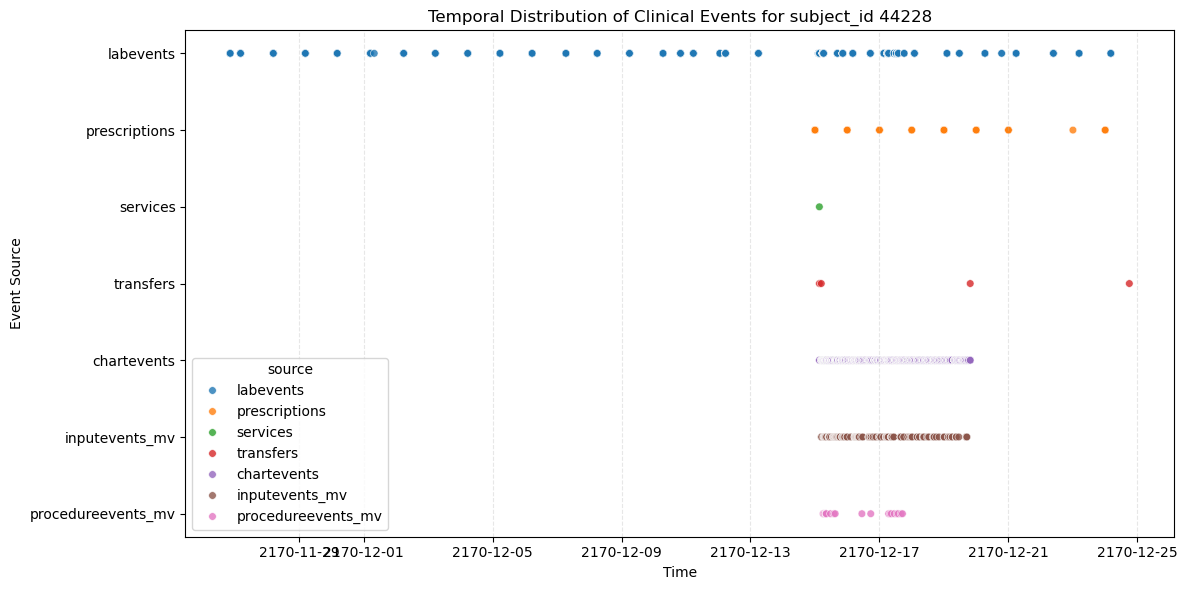

In [4]:
event_queries = {
    'chartevents': f"""
        SELECT ce.charttime AS event_time,
               di.label AS event_label,
               'chartevents' AS source
        FROM chartevents ce
        JOIN d_items di ON ce.itemid = di.itemid
        WHERE ce.subject_id = {subject_id}
          AND ce.charttime IS NOT NULL
    """,
    'labevents': f"""
        SELECT le.charttime AS event_time,
            dl.label AS event_label,
            le.valuenum,
            'labevents' AS source
        FROM labevents le
        JOIN d_labitems dl ON le.itemid = dl.itemid
        WHERE le.subject_id = {subject_id}
        AND le.charttime IS NOT NULL
    """,
    'inputevents_mv': f"""
        SELECT imv.starttime AS event_time,
               di.label AS event_label,
               'inputevents_mv' AS source
        FROM inputevents_mv imv
        JOIN d_items di ON imv.itemid = di.itemid
        WHERE imv.subject_id = {subject_id}
          AND imv.starttime IS NOT NULL
    """,
    'procedureevents_mv': f"""
        SELECT pev.starttime AS event_time,
               di.label AS event_label,
               'procedureevents_mv' AS source
        FROM procedureevents_mv pev
        JOIN d_items di ON pev.itemid = di.itemid
        WHERE pev.subject_id = {subject_id}
          AND pev.starttime IS NOT NULL
    """,
    'prescriptions': f"""
        SELECT startdate AS event_time,
               drug AS event_label,
               'prescriptions' AS source
        FROM prescriptions
        WHERE subject_id = {subject_id}
          AND startdate IS NOT NULL
    """,
    'transfers': f"""
        SELECT intime AS event_time,
              COALESCE(prev_careunit, 'UNKNOWN') || ' → ' || COALESCE(curr_careunit, 'UNKNOWN') AS event_label,
              'transfers' AS source
       FROM transfers
       WHERE subject_id = {subject_id}
       AND intime IS NOT NULL
    """,
    'services': f"""
        SELECT transfertime AS event_time,
               curr_service AS event_label,
               'services' AS source
        FROM services
        WHERE subject_id = {subject_id}
          AND transfertime IS NOT NULL
    """
}

# --- Step 3: Execute all queries and combine ---
event_dfs = []

for source, query in event_queries.items():
    df = con.execute(query).fetchdf()
    event_dfs.append(df)

timeline_df = pd.concat(event_dfs, ignore_index=True)
timeline_df = timeline_df.dropna(subset=['event_time'])
timeline_df = timeline_df.sort_values(by='event_time')

# --- Step 4: Plot ---
plt.figure(figsize=(12, 6))

sns.scatterplot(
    data=timeline_df,
    x='event_time',
    y='source',
    hue='source',
    s=30,
    alpha=0.8,
    legend=True
)

plt.title(f"Temporal Distribution of Clinical Events for subject_id {subject_id}")
plt.xlabel("Time")
plt.ylabel("Event Source")
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [5]:
query = f"""SELECT * FROM services WHERE subject_id = {subject_id}"""
df = con.execute(query).fetchdf()
display(df)

query = f"""SELECT * FROM transfers WHERE subject_id = {subject_id}"""
df = con.execute(query).fetchdf()
display(df)


,row_id,subject_id,hadm_id,transfertime,prev_service,curr_service
0,50332,44228,103379,2170-12-15 03:15:39,None,SURG


,row_id,subject_id,hadm_id,icustay_id,dbsource,eventtype,prev_careunit,curr_careunit,prev_wardid,curr_wardid,intime,outtime,los
0,182055,44228,103379,NaN,metavision,admit,None,None,NaN,54.0,2170-12-15 03:15:39,2170-12-15 04:41:39,1.43
1,182056,44228,103379,217992.0,metavision,transfer,None,SICU,54.0,57.0,2170-12-15 04:41:39,2170-12-19 19:33:09,110.86
2,182057,44228,103379,NaN,metavision,transfer,SICU,None,57.0,54.0,2170-12-19 19:33:09,2170-12-24 17:59:13,118.43
3,182058,44228,103379,NaN,metavision,discharge,None,None,54.0,NaN,2170-12-24 17:59:13,None,NaN


In [7]:
import plotly.express as px

# Make sure the legend shows counts too
source_counts = timeline_df['source'].value_counts()
label_map = {
    source: f"{source} ({count:,})"
    for source, count in source_counts.items()
}
timeline_df['source_labeled'] = timeline_df['source'].map(label_map)

# Plot with both event_label and valuenum
fig = px.scatter(
    timeline_df,
    x="event_time",
    y="source_labeled",
    color="source_labeled",
    hover_data={
        "event_label": True,
        "valuenum": True,
        "event_time": False,
        "source_labeled": False
    },
    title=f"Temporal Distribution of Events for subject_id {subject_id}",
    height=600
)

fig.update_traces(marker=dict(size=6, opacity=0.7))
fig.update_layout(
    xaxis_title="Time",
    yaxis_title="Event Source",
    legend_title="Source (Event Count)",
    hoverlabel=dict(bgcolor="white", font_size=12),
    margin=dict(t=60, r=20, l=60, b=40)
)

fig.show()


In [8]:
# Step 1: Get labs and chart events with valuenum
lab_query = f"""
SELECT le.subject_id, le.charttime AS event_time,
       dl.label AS event_label,
       le.valuenum,
       'labevents' AS source
FROM labevents le
JOIN d_labitems dl ON le.itemid = dl.itemid
WHERE le.subject_id = {subject_id}
  AND le.charttime IS NOT NULL
  AND le.valuenum IS NOT NULL
"""

chart_query = f"""
SELECT ce.subject_id, ce.charttime AS event_time,
       di.label AS event_label,
       ce.valuenum,
       'chartevents' AS source
FROM chartevents ce
JOIN d_items di ON ce.itemid = di.itemid
WHERE ce.subject_id = {subject_id}
  AND ce.charttime IS NOT NULL
  AND ce.valuenum IS NOT NULL
"""

# Run queries and combine
lab_df = con.execute(lab_query).fetchdf()
chart_df = con.execute(chart_query).fetchdf()
filtered_df = pd.concat([lab_df, chart_df], ignore_index=True)

# Ensure datetime and numeric
filtered_df['event_time'] = pd.to_datetime(filtered_df['event_time'])
filtered_df['valuenum'] = pd.to_numeric(filtered_df['valuenum'], errors='coerce')


In [9]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

# Re-split into labs and charts after loading data
labs_df = filtered_df[filtered_df['source'] == 'labevents'].copy()
charts_df = filtered_df[filtered_df['source'] == 'chartevents'].copy()

# Function to create one subplot per event_label with its own Y-axis scaling
# Updated plotting function: remove redundant Y-axis label since it's already in subplot titles

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd

# Function to create small multiples with subplot titles only (no Y-axis labels)
def create_clean_small_multiples(df, title_prefix, subject_id):
    top_labels = df['event_label'].value_counts().head(10).index.tolist()
    df = df[df['event_label'].isin(top_labels)].copy()
    df['valuenum'] = pd.to_numeric(df['valuenum'], errors='coerce')
    df = df.sort_values(['event_label', 'event_time'])
    df['delta'] = df.groupby('event_label')['valuenum'].diff().round(2)

    fig = make_subplots(
        rows=len(top_labels), cols=1, shared_xaxes=True,
        vertical_spacing=0.02, subplot_titles=top_labels
    )

    palette = px.colors.qualitative.Set2

    for i, label in enumerate(top_labels):
        label_df = df[df['event_label'] == label].sort_values('event_time')
        color = palette[i % len(palette)]

        fig.add_trace(go.Scatter(
            x=label_df['event_time'],
            y=label_df['valuenum'],
            mode='lines+markers',
            name=label,
            marker=dict(size=6, color=color),
            line=dict(color=color),
            customdata=label_df[['delta', 'valuenum']],
            hovertemplate=(
                f"<b>{label}</b><br>" +
                "Time: %{x|%Y-%m-%d %H:%M}<br>" +
                "Value: %{customdata[1]:.2f}<br>" +
                "Δ from previous: %{customdata[0]:+.2f}<br>"
            ),
            showlegend=False
        ), row=i+1, col=1)

        # Remove y-axis title for cleaner layout
        fig.update_yaxes(title_text="", row=i+1, col=1)

    fig.update_layout(
        title=f"{title_prefix}: Top 10 Time-Series Variables for subject_id {subject_id}",
        height=300 + 120 * len(top_labels),
        margin=dict(t=80, b=60, l=80, r=40),
        hovermode='closest',
        showlegend=False
    )

    return fig

# Now regenerate the cleaned plots if data is still available
labs_fig = create_clean_small_multiples(labs_df, "Lab Events", subject_id)
charts_fig = create_clean_small_multiples(charts_df, "Chart Events", subject_id)

labs_fig.show()
charts_fig.show()
